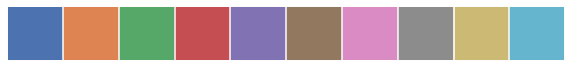

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('talk')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)
import json
from pandas.io.json import json_normalize
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [3]:
labels = ['B-ResNet', 'B-DenseNet', 'MSDNet']
models = ['b-resnet', 'b-densenet', 'msdnet']

results = {model : pd.read_csv(model + '_' 'confidence_inference_test.csv') for model in models}

In [4]:
#ee_res.exit= ee_res.exit.astype('int')
d = {    'ResNet': results['b-resnet'].groupby(['threshold', 'exit', 'correct']).size(),
         'DenseNet': results['b-densenet'].groupby(['threshold', 'exit', 'correct']).size(),
         'MSDNet': results['msdnet'].groupby(['threshold', 'exit', 'correct']).size()   }
df = pd.DataFrame(d)

df = df / 5000
df

ResNet  DenseNet  MSDNet
threshold exit correct                          
0.1       0    False    0.4924    0.4508  0.2744
               True     0.4872    0.5452  0.7256
          1    False    0.0116    0.0022     NaN
               True     0.0084    0.0018     NaN
          2    False    0.0002       NaN     NaN
...                        ...       ...     ...
0.9       2    True     0.4424    0.2028  0.0664
          3    False    0.0700    0.0776  0.0122
               True     0.0772    0.1098  0.0270
          4    False       NaN       NaN  0.0596
               True        NaN       NaN  0.0398

[82 rows x 3 columns]

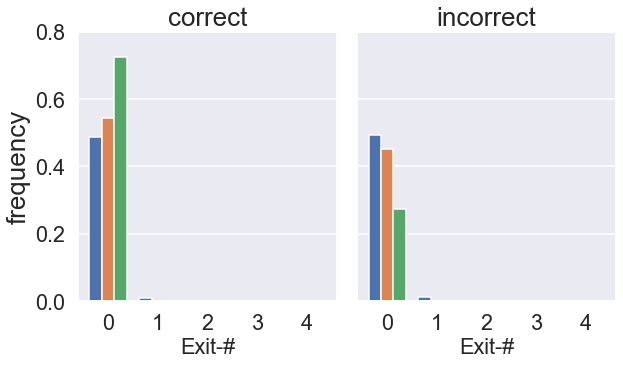

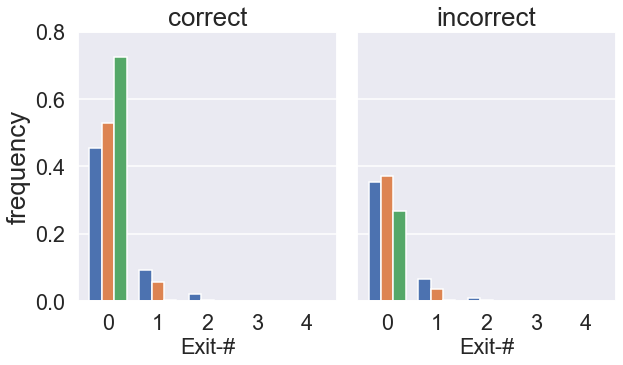

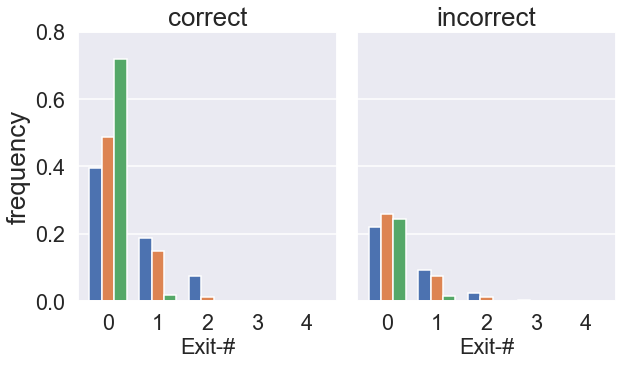

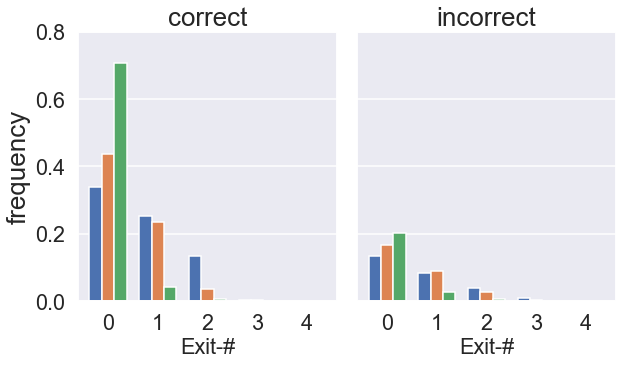

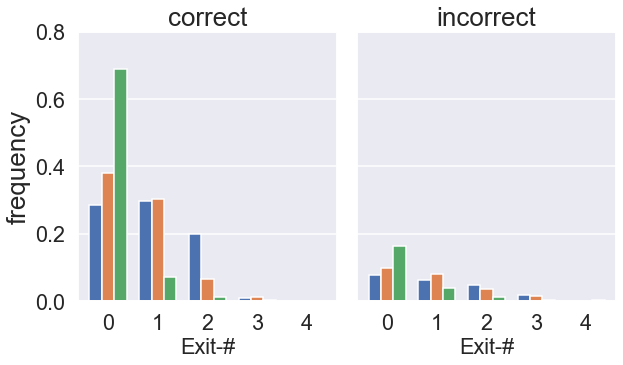

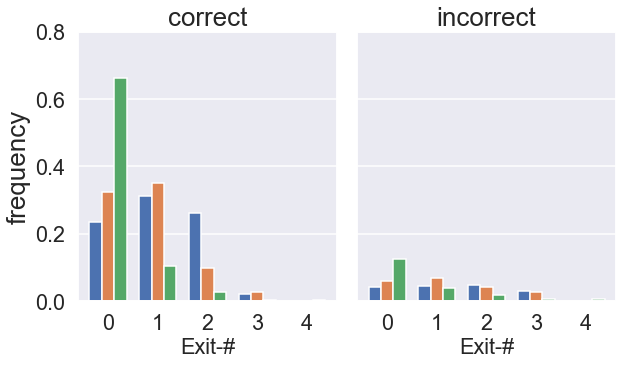

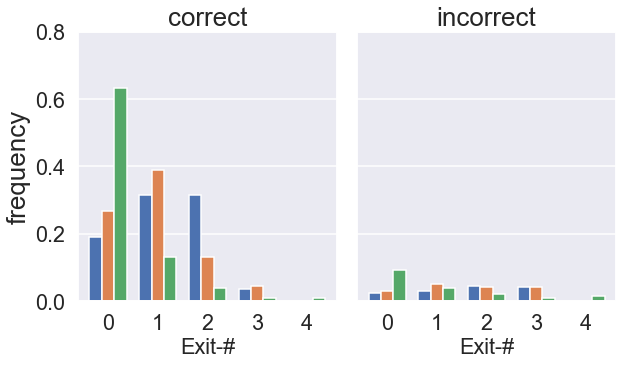

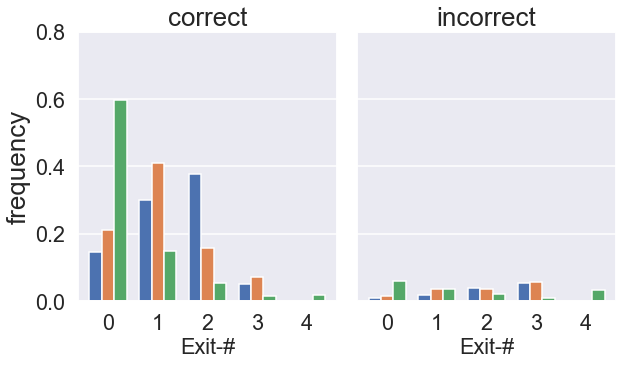

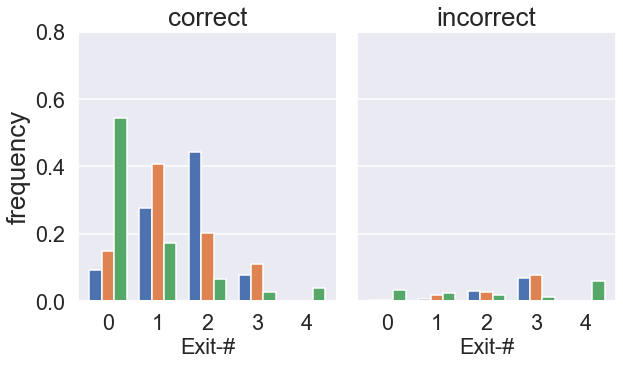

In [13]:
width=1
x=2
n = np.arange(x)

for n, (i, data) in enumerate(df.groupby('threshold')):
    fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(9,6))
    
    # Add some extra space for the second axis at the bottom
    #fig.subplots_adjust(bottom=0.1)

    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    res = np.array(data['ResNet'].tolist())
    dense = np.array(data['DenseNet'].tolist())
    msd = np.array(data['MSDNet'].tolist())
    if len(res) != 8:
        for _ in range(8 - len(res)):
            res = np.append(res,[0,0])
    if len(dense) !=8:
        for _ in range(8 - len(dense)):
            dense = np.append(dense,[0,0])
    if len(msd) != 10:
        for _ in range(10 - len(msd)):
            msd = np.append(msd,[0,0])
    res_correct, dense_correct, msd_correct = res[1::2], dense[1::2], msd[1::2]
    res_incorrect, dense_incorrect, msd_incorrect = res[::2], dense[::2], msd[::2]
    #print(msd)
    
    #print(res_correct)
        
        #axes.bar(4+x+width*index_offset, incorrect[exit_n], width=width)
    for exit_n in range(4):
        #print(incorrect, correct)
        axes[0].bar(exit_n*4 + x , res_correct[exit_n], width=width, color=current_palette[0])
        axes[0].bar(exit_n*4 + x+width, dense_correct[exit_n], width=width, color=current_palette[1])
        
    for exit_n in range(5):
        axes[0].bar(exit_n*4 + x+width*2, msd_correct[exit_n], width=width, color=current_palette[2])
        
    for exit_n in range(4):
        axes[1].bar(exit_n*4 + x , res_incorrect[exit_n], width=width, color=current_palette[0])
        axes[1].bar(exit_n*4 + x+width, dense_incorrect[exit_n], width=width, color=current_palette[1])
    
    for exit_n in range(5):
        axes[1].bar(exit_n*4 + x+width*2, msd_incorrect[exit_n], width=width, color=current_palette[2])
    
    axes[0].set_xlabel('Exit-#', fontsize='large')
    axes[0].set_ylabel('frequency', fontsize='x-large') 
    axes[0].set_title('correct', fontsize='x-large')
    axes[1].set_xlabel('Exit-#', fontsize='large')
    axes[1].set_title('incorrect', fontsize='x-large')
    for ax in axes:
        ax.set_xticks(np.arange(3,20,4))
        ax.set_ylim([0,0.8])
        ax.set_xticklabels(['{}'.format(x) for x in range(5)], fontsize='large')

        ax.xaxis.grid(None)
        
    for tick in axes[0].yaxis.get_major_ticks():
                tick.label.set_fontsize('large') 

    fig.tight_layout()
    
    #fig.suptitle('$T = {:.1f}$'.format(i))

    fig.tight_layout()
    fig.subplots_adjust(top=0.8)

    plt.savefig('model_confidence_comparison_{}.png'.format(n+1))
#fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')


In [226]:
np.arange(3,45,4)

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39, 43])

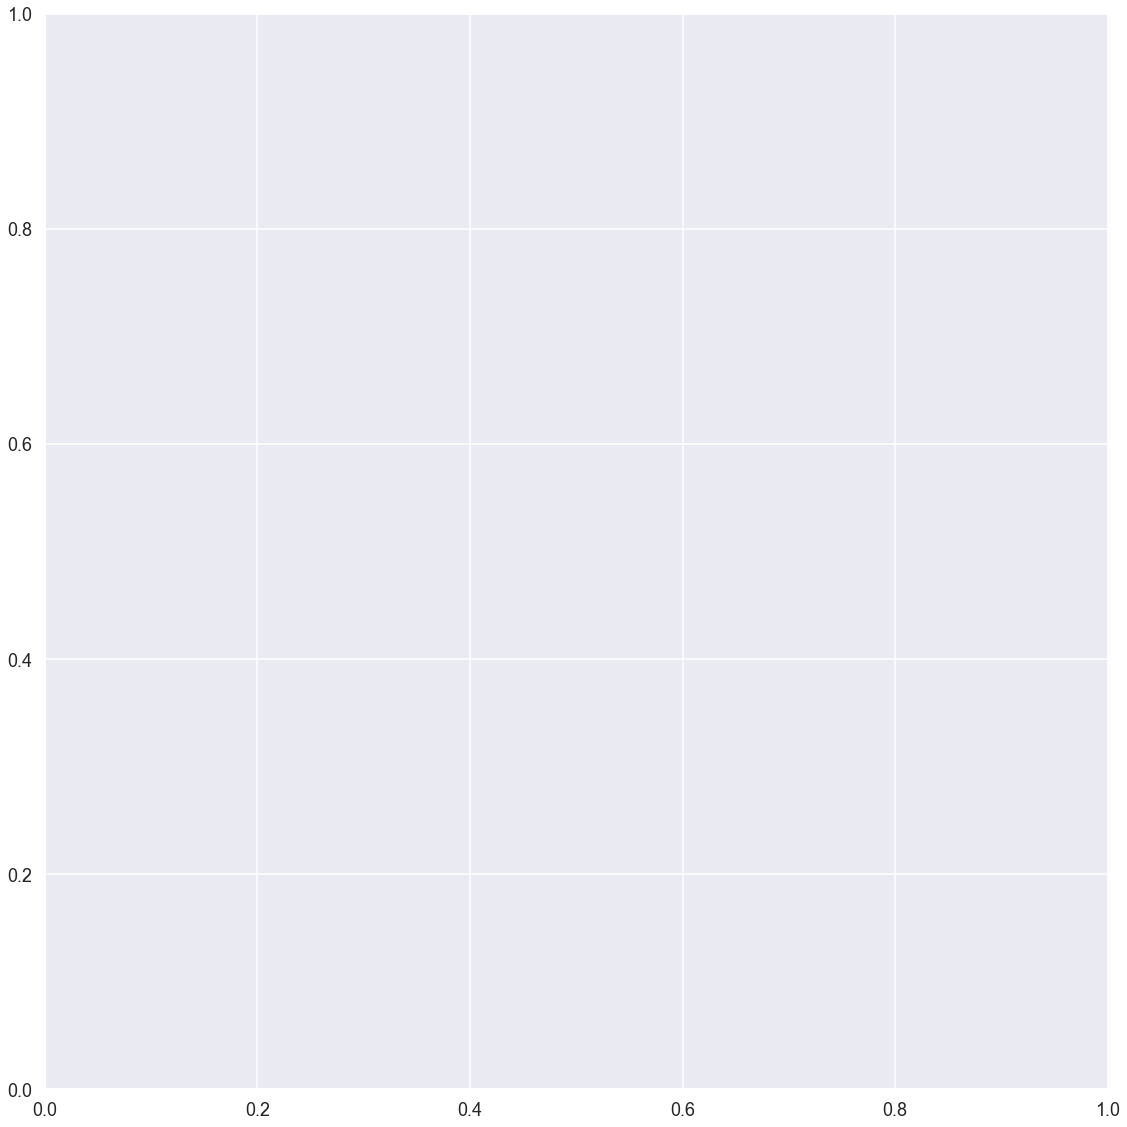

In [25]:
width=0.8
x=10
n = np.arange(x)
fig, axes = plt.subplots(1,1, sharex=True, sharey=True, figsize=(16,16))
for i, (data) in enumerate(df.groupby('threshold')):
    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    data[1].plot(kind='bar', ax=ax, legend=False, width=width)
    #ax.label_outer()
    #i.xtickslabels([1, 2, 3, 4])
    ax.set(xlabel='Exit', ylabel='Ratio', xticks=np.arange(10))
    ax.set_xticklabels(list(np.array([['{}, Incorrect'.format(exit), '{}, Correct'.format(exit)] for exit in np.arange(5)]).flatten()))

    #for tick in ax.get_xticklabels():
    #   tick.set_rotation(90)
        
    #ax2 = ax.secondary_xaxis('bottom')
    #ax2.xaxis.set_ticks([1,3,5,7,9])
    #ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    #ax.spines['bottom'].set_position(('outward', 36))

    #ax2.label_outer()
#fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')
fig.tight_layout()
#fig.subplots_adjust(top=0.90)
#plt.savefig('inference_threshold_test.PNG')

In [ ]:
np.arange(1,6)*0.5

In [ ]:
list(np.array([['Correct {}'.format(exit), 'Incorrect {}'.format(exit)] for exit in np.arange(5)]).flatten())

In [ ]:
df['ResNet']

In [ ]:
models = ['b-densenet', 'b-resnet', 'msdnet']
df = pd.DataFrame({
        'model':models,
        'exit-0':np.random.randn(3),
        'score2':np.random.randn(3),

                   })

df